In [1]:
%load_ext autoreload
%autoreload 1

In [2]:
%aimport gf
%aimport bch

In [170]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = 10, 7

<br>

# Скорость работы БЧХ-кода

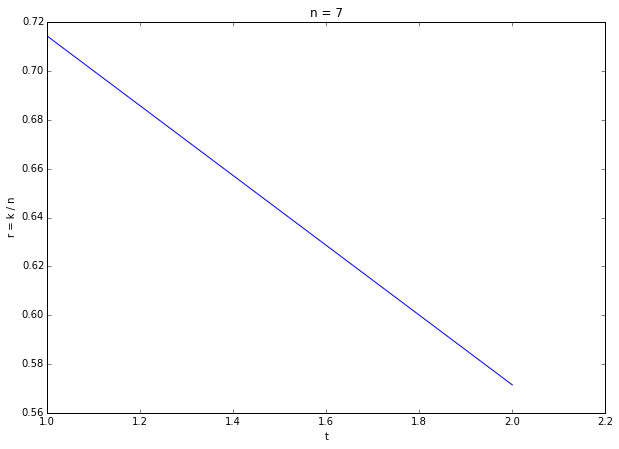

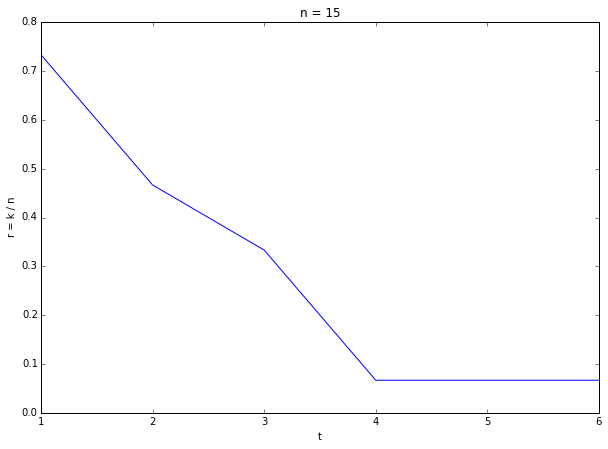

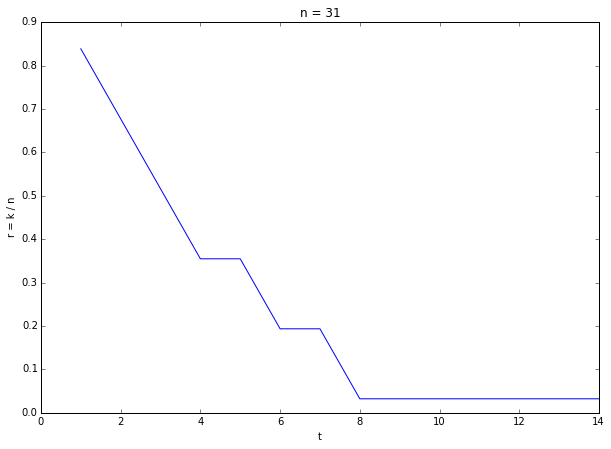

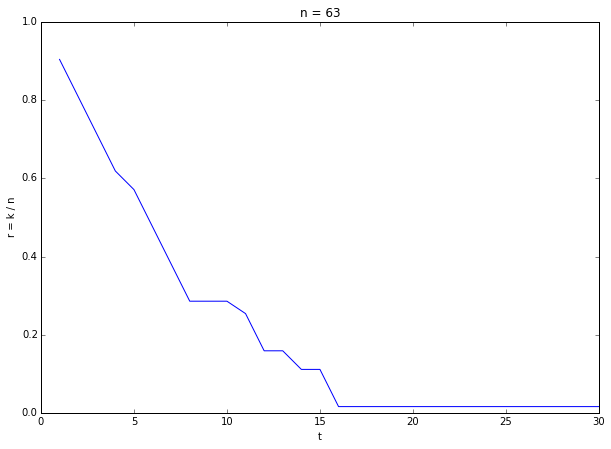

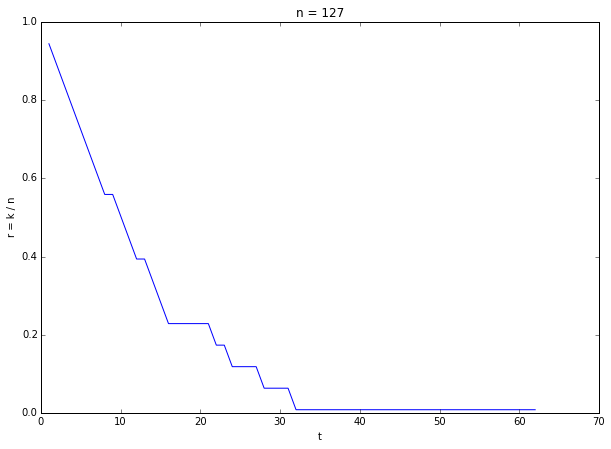

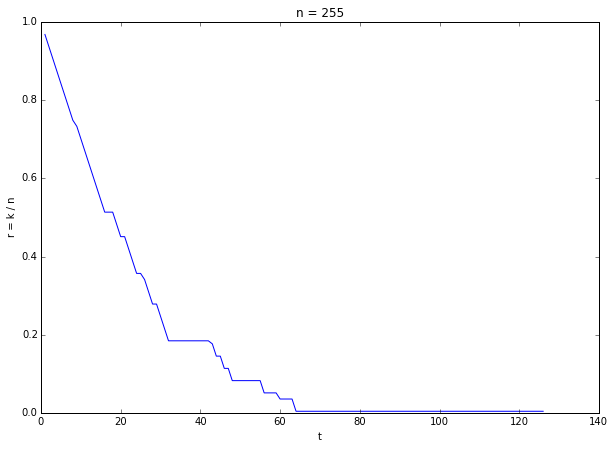

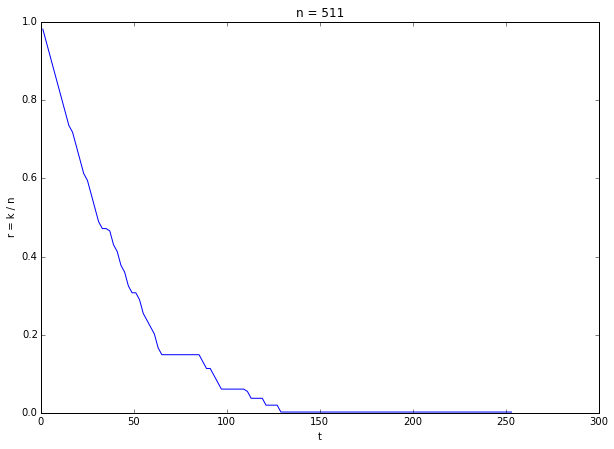

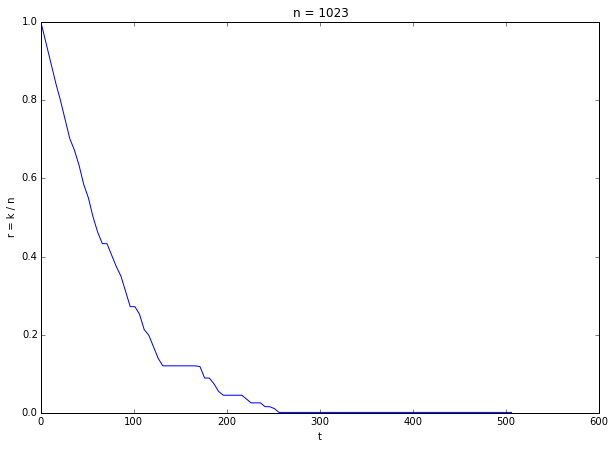

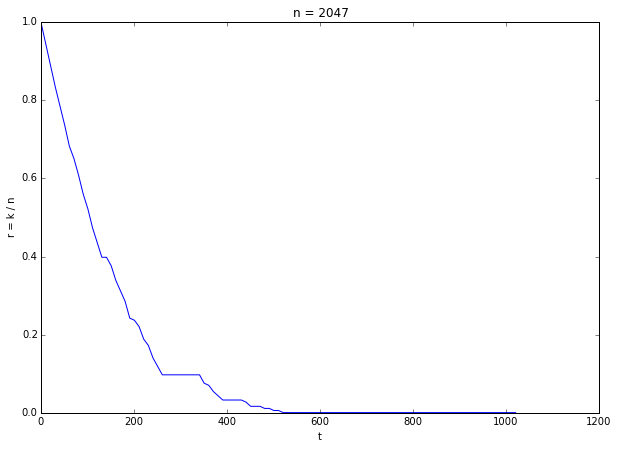

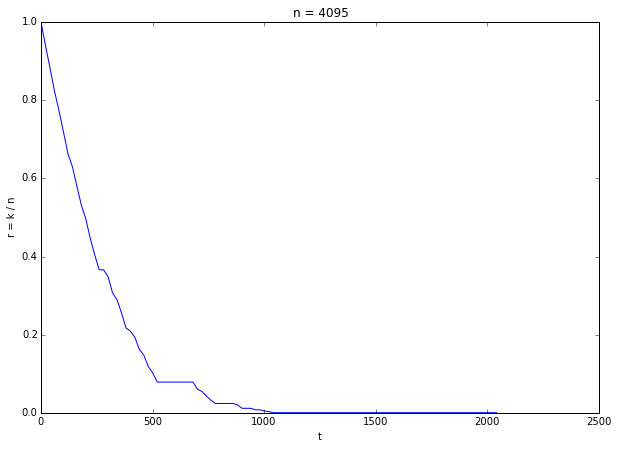

In [183]:
for i in range(3, 12 + 1):
    n = (1 << i) - 1
    t_max = (n - 1) // 2
    ts = np.arange(1, t_max, t_max // 100 if t_max > 100 else 1)
    r = []
    for t in ts:
        k = n - bch.genpoly(n, t)[0].size + 1
        r.append(k / n)
    plt.title('n = ' + str(n))
    plt.xlabel('t')
    plt.ylabel('r = k / n')
    plt.plot(ts, r)
    plt.show()

### Пимер БЧХ-кода, для которого истинное минимальное расстояние больше, чем величина 2t + 1

In [312]:
n = 15
t = 6
print('Минимальное расстояние:', bch.dist(bch.genpoly(n, t)[0], n))
print('2t+1 =', 2 * t + 1)

Минимальное расстояние: 15
2t+1 = 13


# Cравнение двух методов декодирования по времени работы

In [203]:
import time

In [205]:
n = (1 << 9) - 1

In [207]:
W = np.random.randint(2, size=(10, n))

In [209]:
t_max = (n - 1) // 2
ts = np.arange(1, t_max, t_max // 100)
euclid = []
pgz = []
for t in ts:
    g, R, pm = bch.genpoly(n, t)
    
    _time = time.clock()
    bch.decoding(W, R, pm, 'euclid')
    euclid.append(time.clock() - _time)

    _time = time.clock()
    bch.decoding(W, R, pm, 'pgz')
    pgz.append(time.clock() - _time)

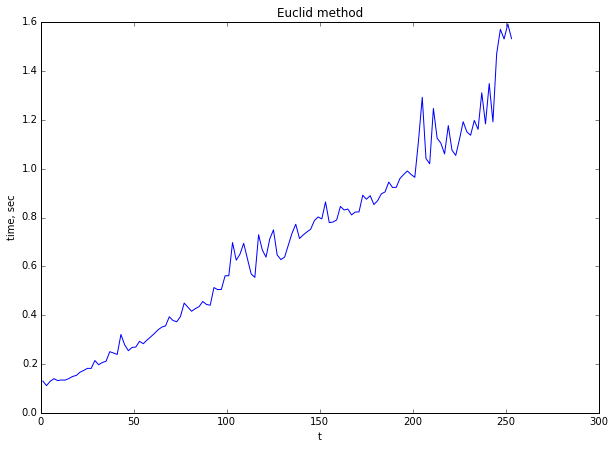

In [218]:
plt.title('Euclid method')
plt.xlabel('t')
plt.ylabel('time, sec')
plt.plot(ts, euclid)

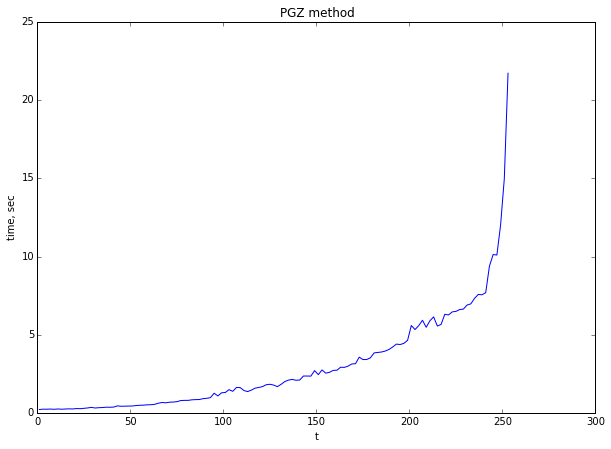

In [220]:
plt.title('PGZ method')
plt.xlabel('t')
plt.ylabel('time, sec')
plt.plot(ts, pgz)

# Статистические испытания

In [ ]:
n = (1 << 6) - 1
t_max = (n - 1) // 2
t = t_max // 2
g, R, pm = bch.genpoly(n, t)
k = n - g.size + 1
N = 1000
U = np.random.randint(2, size=(N, k))
W_orig = bch.coding(U, g)
err = []
tr = []
na = []
for nju in range(1, t_max):
    W = np.copy(W_orig)
    for i in range(N):
        indx = np.random.choice(W.shape[1], size=nju)
        W[i, indx] ^= 1
    W_dec = bch.decoding(W, R, pm)
    tmp = (W_dec - W_orig).sum(axis=1)
    tr.append(tmp[tmp == 0].size / tmp.size)
    na.append(np.where(W_dec[:, 0] < -10000)[0].size / tmp.size)
    err.append(1 - tr[-1] - na[-1])

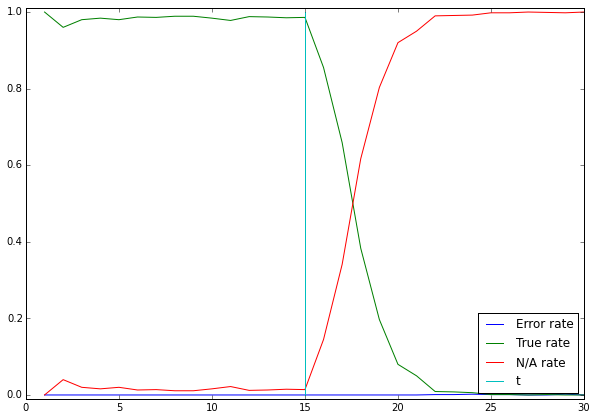

In [306]:
plt.plot(range(1, t_max), err, label='Error rate')
plt.plot(range(1, t_max), tr, label='True rate')
plt.plot(range(1, t_max), na, label='N/A rate')
plt.plot([t, t], [0, 1], label='t')
plt.ylim(-0.01, 1.01)
plt.legend(loc='best')